+ This project aims to explore and analyze a dataset of approximately 48,894 Airbnb listings in order to gain a better understanding of the factors that drive success on the platform.

### Breakdown of this notebook:

- Importing libraries
* Loading the dataset
* Data cleaning
* Data visualization

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Loading dataset

In [2]:
df =  pd.read_csv(r"C:\Users\DELL\Downloads\Airbnb_dataset.csv")

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [4]:
df.tail(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48885,36482809,Stunning Bedroom NYC! Walking to Central Park!!,131529729,Kendall,Manhattan,East Harlem,40.79633,-73.93605,Private room,75,2,0,NaN,NaN,2,353
48886,36483010,Comfy 1 Bedroom in Midtown East,274311461,Scott,Manhattan,Midtown,40.75561,-73.96723,Entire home/apt,200,6,0,NaN,NaN,1,176
48887,36483152,Garden Jewel Apartment in Williamsburg New York,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170,1,0,NaN,NaN,3,365
48888,36484087,"Spacious Room w/ Private Rooftop, Central loca...",274321313,Kat,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,0,NaN,NaN,1,31
48889,36484363,QUIT PRIVATE HOUSE,107716952,Michael,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,NaN,NaN,2,163
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

*  This dataset has around 49,000 observations in it with 16 columns

###### Checking Duplicates

In [6]:
df.duplicated().sum()

0



- No duplicates found

###### Null values

In [7]:

df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

- As we can see that we have 16 null values in 'name' column, 21 null values in 'host_name' and 10052 null values each in 'last_review' and 'reviews_per_month'.

###### Handling null values

In [8]:
df.fillna({'reviews_per_month': 0},inplace =True)
df.fillna({'name': "no name"},inplace = True)
df.fillna({'host_name':"no host name:"},inplace =True)
df.fillna({'last_review': "notreviewed"},inplace = True)

In [9]:
#make sure to check it again

df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

######  Dropping the unnecessary columns

In [10]:
df.drop(['name','last_review', 'reviews_per_month','latitude','longitude'], axis = 1 , inplace = True)

###### Examine changes

In [11]:
df.head()

,id,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


In [12]:
df.columns.to_list()

['id',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'calculated_host_listings_count',
 'availability_365']

##### Count room_type

In [13]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

- Most listings are either Entire home or Private room

##### Average price per room_type

In [14]:
df.groupby("room_type")["price"].mean()

room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64

- Entire room has the highest price and shared room has lowest avg price which makes sense.

In [15]:
df.describe()

,id,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,152.720687,7.029962,23.274466,7.143982,112.781327
std,1.098311e+07,7.861097e+07,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.539000e+03,2.438000e+03,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,327.000000,365.000000


- We saw that the price column has some irregularity as the minimum price of the apartment is 0 i.e. free stay.

**Analyzing 'price' column** 

In [16]:
df.loc[df['price'] <= 0].head()

,id,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
23161,18750597,8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,Private room,0,4,1,4,28
25433,20333471,131697576,Anisha,Bronx,East Morrisania,Private room,0,2,55,4,127
25634,20523843,15787004,Martial Loft,Brooklyn,Bushwick,Private room,0,2,16,5,0
25753,20608117,1641537,Lauren,Brooklyn,Greenpoint,Private room,0,2,12,2,0
25778,20624541,10132166,Aymeric,Brooklyn,Williamsburg,Entire home/apt,0,5,3,1,73


  *Replace zeros with NaN*


In [17]:
df['price'].replace(0,np.nan,inplace = True)

*Replacing zero with median*

In [18]:
df.fillna(value=df['price'].median(), inplace=True)

In [19]:
df['price'].min()

10.0

- We have successfully replaced zero with median

##### Arbnbs Having most number of Reviews

In [20]:
most_reviews = df.sort_values('number_of_reviews', ascending = False)
most_reviews.head(5)

,id,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
11759,9145202,47621202,Dona,Queens,Jamaica,Private room,47.0,1,629,2,333
2031,903972,4734398,Jj,Manhattan,Harlem,Private room,49.0,1,607,3,293
2030,903947,4734398,Jj,Manhattan,Harlem,Private room,49.0,1,597,3,342
2015,891117,4734398,Jj,Manhattan,Harlem,Private room,49.0,1,594,3,339
13495,10101135,47621202,Dona,Queens,Jamaica,Private room,47.0,1,576,2,173


##### Cheapest Airbnbs in New York City

In [21]:
cheap_airbnb = df.sort_values('price', ascending = True)
cheap_airbnb.head(5)

,id,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
31066,24114389,180661875,Salim,Manhattan,Upper West Side,Private room,10.0,1,2,1,0
33225,26235873,197169969,Maria,Queens,Jamaica,Entire home/apt,10.0,2,22,1,332
34446,27316669,205820814,Luz,Bronx,Highbridge,Private room,10.0,1,0,1,180
21700,17437106,33511962,Morgan,Manhattan,Harlem,Shared room,10.0,1,0,1,0
22835,18490141,97001292,Maria,Queens,Jamaica,Entire home/apt,10.0,1,43,1,252


### Data Visualization
- Visualize your data and search for pattern that can help you solve your problem.

Text(0.5, 1.0, 'Room Type vs Price')

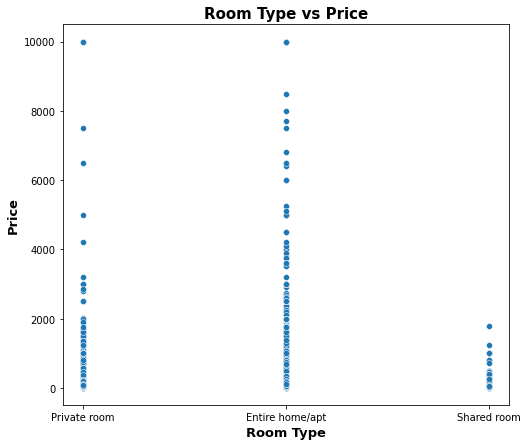

In [22]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='room_type', y='price', data=df)
plt.xlabel("Room Type", size=13,weight='bold')
plt.ylabel("Price", size=13,weight='bold')
plt.title("Room Type vs Price",size=15, weight='bold')

- A scatter can be a valuable tool for data analysis when trying to understand and analyze the relationships between different variables and identify patterns and trends in the data.

- People prefer either Entire home/apt or private room rather than shared room



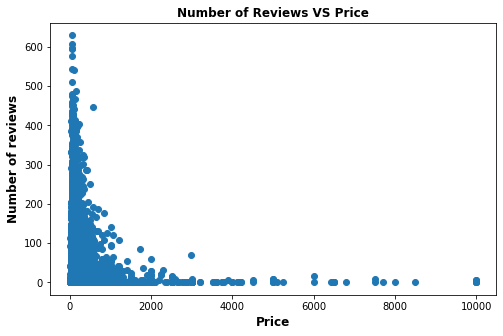

In [23]:
fig=plt.figure(figsize=(8,5))
plt.scatter(x='price', y='number_of_reviews', data=df)
plt.xlabel('Price',weight = 'bold',size=12)
plt.ylabel('Number of reviews',weight = 'bold',size=12)
plt.title('Number of Reviews VS Price',weight = 'bold',size=12)
plt.show()    

- The distribution of prices is heavily skewed to the *right*.

- From the above Analysis we can say that most people prefer to stay in place where price is less.

<AxesSubplot:>

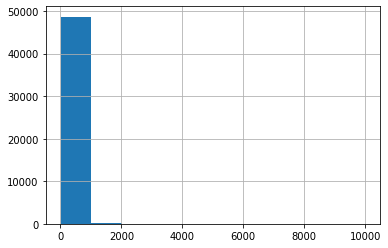

In [24]:
#lets take a closure look

df["price"].hist()

- Most listings have **price less than $1000**


### Most listings in each Neighbourhood Group

In [25]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

Text(0.5, 1.0, 'Number of Airbnb listings in each Borough')

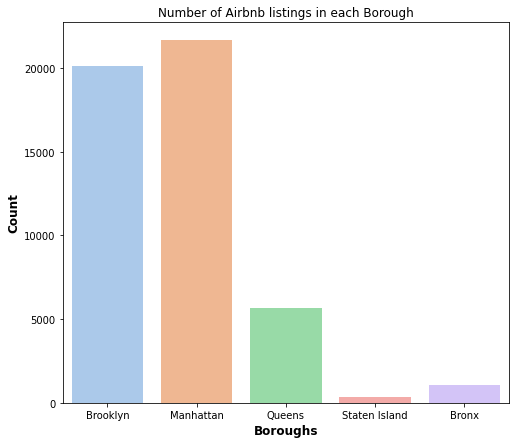

In [26]:
plt.figure(figsize=(8,7))
sns.countplot(x='neighbourhood_group',
                   data=df,palette='pastel')
plt.ylabel('Count',weight = 'bold',size=12)
plt.xlabel('Boroughs',weight = 'bold',size=12)
plt.title('Number of Airbnb listings in each Borough')

- After analyzing the data we found **Brooklyn** , **Manhattan** has the most number of  listings as we can see from above graph.

### Which types of room occupied by a neighborhood.

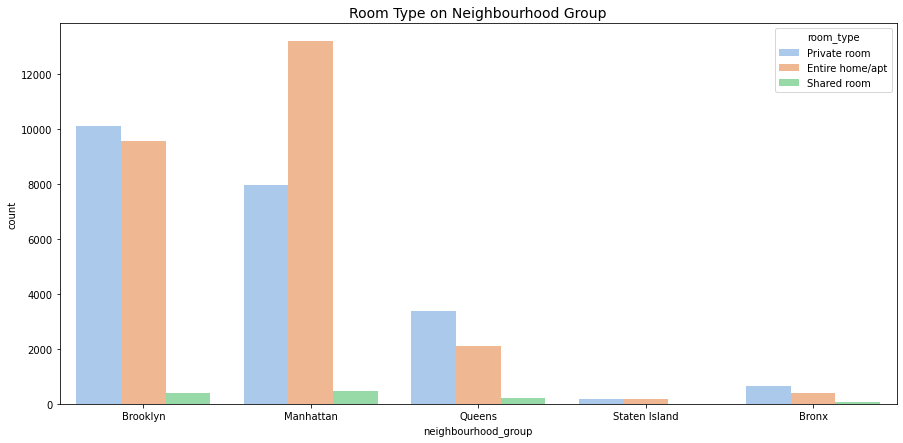

In [27]:
plt.figure(figsize=(15,7))
plt.title("Room Type on Neighbourhood Group",size = 14)
sns.countplot(x= 'neighbourhood_group',data = df,hue=df.room_type, palette="pastel")
plt.show()

- Amoung all different Neighbourhood Group **Manhattan and Brooklyn** has maximum airbnb and Staten Island has least airbnb.

- We also note thar most listing are **entire home type followed by private room** and shared room which is the cheapest.

###  Calculate the average price by neighbourhood_group

Text(0.5, 1.0, 'Price Point of neighbourhood_group')

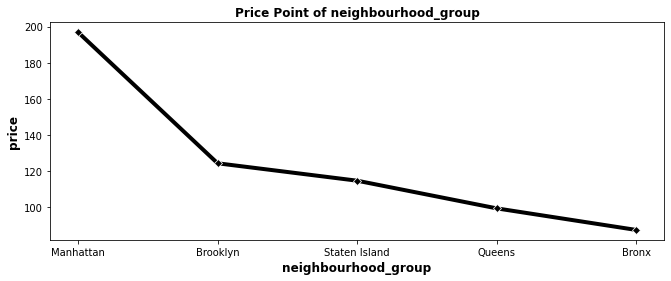

In [28]:
avg_price = df.groupby('neighbourhood_group')['price'].mean().reset_index().sort_values('price' ,ascending = False)
plt.figure(figsize= (11,4))
sns.lineplot(data = avg_price ,x='neighbourhood_group',y= 'price',marker = 'D',color= 'Black', linewidth= 4)
plt.ylabel('price',weight = 'bold',size=12)
plt.xlabel('neighbourhood_group',weight = 'bold',size=12)
plt.title('Price Point of neighbourhood_group', weight = 'bold')

 **Insights found from the chart**
 
- It appears that the average price of Airbnb listings in **Manhattan** is higher compared to other boroughs. Additionally, we found that **Staten Island** has a lower number of Airbnb listings, but the average price for those listings is relatively higher when compared to other boroughs.
 
- In Manhattan, *the average price is 196*, which is competitive and offers good value for generating profitable revenue and enhancing brand perception.

- However, in Staten Island, the average price is relatively high compared to the number of available Airbnb listings. This can potentially decrease demand and result in negative brand perception.


### Check top 10 busiest host

<AxesSubplot:title={'center':'Which was the host max no. of times'}, xlabel='host_id', ylabel='count'>

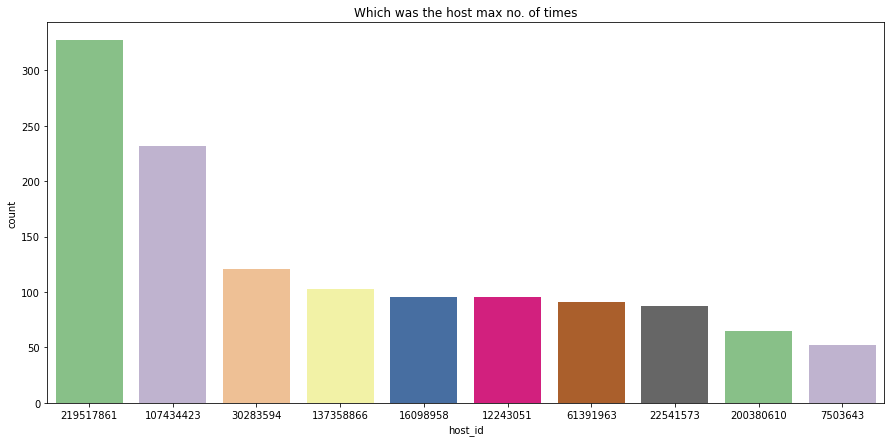

In [29]:
plt.figure(figsize=(15, 7))
plt.title("Which was the host max no. of times")
sns.countplot(x = "host_id", order=df['host_id'].value_counts().index[0:10] ,data=df,palette='Accent')

### Top 10 Host with Most Airbnb

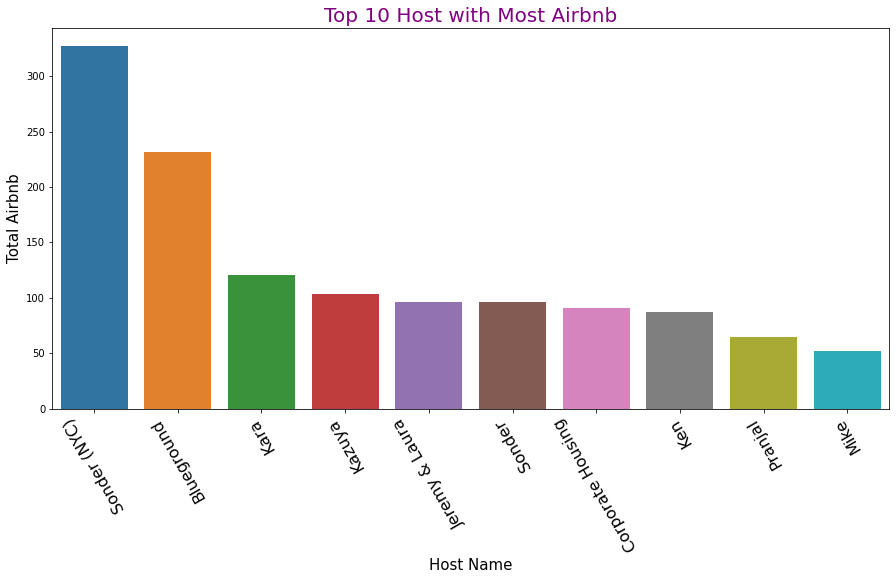

In [30]:
df_popular_host = df.groupby(['host_id','host_name'])['calculated_host_listings_count'
                                ].max().reset_index().sort_values(
                            'calculated_host_listings_count',ascending = False)[:10]
plt.figure(figsize=(15, 7))
sns.barplot(data= df_popular_host,x='host_name',y='calculated_host_listings_count')
plt.xlabel("Host Name", fontsize=15)
plt.xticks(fontsize = 16, rotation = 120);
plt.ylabel("Total Airbnb", fontsize=15)
plt.title('Top 10 Host with Most Airbnb', fontsize=20, color='purple');

### Which Hosts are charging higher price?

In [31]:

df_price = df.groupby(['host_id','host_name','room_type','neighbourhood_group'])['price'].max().reset_index().sort_values(by='price',ascending=False).head(10)

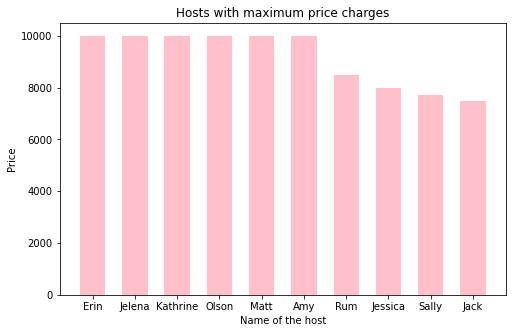

In [38]:
host_name = df_price['host_name']
prices = df_price['price']
fig= plt.figure(figsize=(8,5))
plt.bar(host_name, prices ,color='pink',width=0.6)
plt.xlabel('Name of the host')
plt.ylabel('Price')
plt.title("Hosts with maximum price charges")
plt.show()

- Maximum Price is 10000 USD by **Erin**

### Top 10 neighbourhoods.

In [ ]:
plt.figure(1, figsize=(15, 7))
sns.countplot(x = "neighbourhood", order=df['neighbourhood'].value_counts().index[0:10] ,data=df)
plt.title("Neighbourhood Counts")

### Minimum night stay

([<matplotlib.axis.XTick at 0x1f1bda00b20>,
 [Text(1, 0, '1'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20'),
  Text(25, 0, '25'),
  Text(30, 0, '30'),
  Text(35, 0, '35'),
  Text(40, 0, '40')])

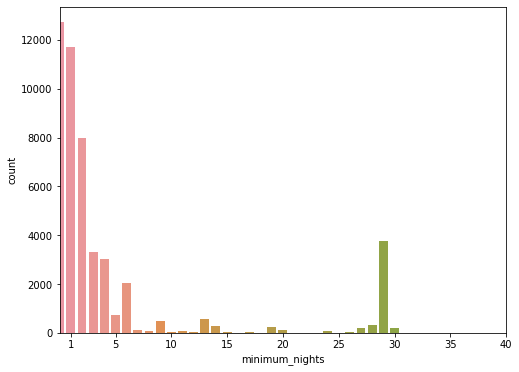

In [34]:
plt.figure(figsize=(8, 6))
sns.countplot(x='minimum_nights', data = df)
plt.xlim(0, 40)
tick = [1,5,10,15,20,25,30,35,40]
plt.xticks(tick, tick)

- It seems that most listings have a minimum stay requirement of **less than 5 days**, but there are some listings that allow guests to stay for *a month or more*. 
- The countplot can provide a visual representation of the distribution of minimum nights for the listings in the dataframe.

### Minimum nights for bookings

<AxesSubplot:>

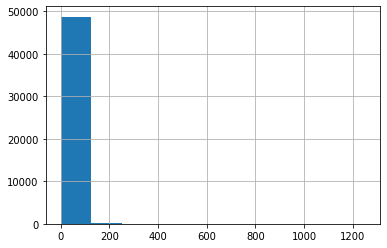

In [33]:
df['minimum_nights'].hist()

- It appears that the majority of bookings have a minimum night requirement of **1 to 100 nights**

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group")
plt.pie(df['neighbourhood_group'].value_counts(), labels=df['neighbourhood_group'].value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

- Brooklyn may have a smaller slice, indicating that it has a lesser share of listings compared to Manhattan. The chart may also have been overlaid on a map of New York City neighborhoods, with the slices positioned near the corresponding neighborhood groups to visually represent the geographical distribution of listings.

### What recommendations would you suggest to the client in order to achieve their business objectives?

- Based on our visualization, it is evident that the demand for entire home type /private rooms is the highest. Therefore, we recommend our host to prioritize providing maximum entire home type /private rooms to cater to this demand.

- Considering that Manhattan and Brooklyn are popular neighborhoods with many tourist attractions, and the demand for accommodation is high in these areas, we suggest Airbnb to expand their business in these neighborhoods to tap into the potential market.

- Additionally, our analysis revealed that most guests prefer staying in rooms priced between 0 to 2000. Hence, Airbnb should focus on offering listings within this price range to cater to the preferences of potential guests.

# Conclusion

- Amoung all different area **Manhattan and Brooklyn** has maximum airbnb and Staten Island has least airbnb.
- Most people prefer to pay **less price**.
- **Sounder (NYC)** is the most popular host with the highest number of airbnb listings.
- Private rooms are more in **Brooklyn** than any other groups.
- Shared rooms are more in **Manhattan** followed by **Brooklyn**.
- **Entire home/apt** is expensive than **Private room** and 'Shared room'. And **Shared rooms** has price per night is very low.
-Most listings have a minimum stay requirement of **less than 5 days**
